# **Tutorial for Biopython and BLAST**  

In this tutorial, we will explore the fundamentals of **Biopython**, a powerful library for computational biology, and learn how to perform **BLAST (Basic Local Alignment Search Tool)** searches programmatically. We will start with an introduction to Biopython, followed by hands-on exercises to help you apply these concepts in real-world scenarios. Finally, we will guide you through constructing and completing relevant assignments.  

---

## **What is Biopython?**  

Biopython is an open-source Python library designed for **computational biology and bioinformatics**. It provides tools for handling:  

- **Biological sequences** (DNA, RNA, and protein)  
- **BLAST searches** (querying databases for sequence alignment)  
- **Multiple sequence alignments**  
- **Phylogenetic analysis**  
- **Parsing bioinformatics file formats** (FASTA, GenBank, PDB, etc.)  
- **Interacting with online databases like NCBI and UniProt**  

Biopython simplifies these tasks by offering intuitive functions that allow researchers and developers to process biological data efficiently.  


# 0. Setup 🔧

In [8]:
#installing the BioPython
!pip install biopython

In [9]:
#verify installation
import Bio
print(Bio.__version__)

1.85


# **📌 Working with Biological Sequences**  

## **What is a Biological Sequence?**  

In bioinformatics, a **biological sequence** is a string of characters representing **DNA, RNA, or protein** sequences. These sequences are fundamental to understanding genetic information, protein synthesis, and evolutionary relationships.  

### **Examples of Biological Sequences:**  
- **DNA**: `"ATGCATCG"` (Adenine, Thymine, Guanine, Cytosine)  
- **RNA**: `"AUGCAGU"` (Adenine, Uracil, Guanine, Cytosine)  
- **Protein**: `"MGLSDGE"` (Amino acid sequence using single-letter codes)  

---

## **What is `Seq` in Biopython?**  

Biopython provides the **`Seq` module**, which is specifically designed for handling biological sequences efficiently. Unlike regular Python strings, `Seq` objects include **bioinformatics-specific functions** that allow operations like:  

### **Key Features of `Seq`**  
✅ **Reverse Complement** – Get the complementary strand of a DNA sequence  
✅ **Transcription** – Convert DNA to RNA  
✅ **Translation** – Convert RNA to a protein sequence  
✅ **Mutation Handling** – Modify sequences easily  



In [10]:
from Bio.Seq import Seq

# Define a DNA sequence
dna_seq = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG")

print("Original DNA Sequence:", dna_seq)

# 1. Reverse Complement
reverse_complement = dna_seq.reverse_complement()
print("Reverse Complement:", reverse_complement)

# 2. Transcription (DNA → RNA)
rna_seq = dna_seq.transcribe()
print("Transcribed RNA:", rna_seq)

# 3. Translation (RNA → Protein)
protein_seq = rna_seq.translate()
print("Translated Protein:", protein_seq)

# 4. Back-translation (Converting protein sequence back to possible DNA sequence)
# Note: This is only an approximation since multiple codons map to the same amino acid
possible_dna = protein_seq.back_transcribe()
print("Back-Transcribed DNA:", possible_dna)


Original DNA Sequence: ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG
Reverse Complement: CTATCGGGCACCCTTTCAGCGGCCCATTACAATGGCCAT
Transcribed RNA: AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG
Translated Protein: MAIVMGR*KGAR*
Back-Transcribed DNA: MAIVMGR*KGAR*


###  **Code explanation**
#### **1. Importing the Required Module**
We import the `Seq` class from `Bio.Seq`, which provides functionalities to handle biological sequences.

#### **2. Defining a DNA Sequence**
We create a `Seq` object containing a DNA sequence (`ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG`).

#### **3. Reverse Complement**
DNA is double-stranded, and the reverse complement is the sequence that binds to the given strand. The `.reverse_complement()` method provides this.

#### **4. Transcription**
DNA is transcribed into RNA by replacing **T (Thymine)** with **U (Uracil)**. The `.transcribe()` method does this.

#### **5. Translation**
RNA is translated into a **protein sequence** using the genetic code, where each **codon (3 nucleotides)** corresponds to an amino acid. The `.translate()` method achieves this.

#### **6. Back-Translation (Approximate)**
Given a protein sequence, `.back_transcribe()` can generate a possible DNA sequence, though multiple DNA codons can code for the same amino acid.


### **📝 Task: Retrieve a Sequence from an Online Database**  

Before running BLAST, let's retrieve a **random DNA, RNA, or protein sequence** from a **biological database** and apply the organizational method we discussed earlier.  

### **🔹 Where to Find Sequences?**  
You can get real biological sequences from these databases:  

- **[RCSB PDB](https://www.rcsb.org/)** – Protein structures with sequences  
- **[UniProt](https://www.uniprot.org/)** – High-quality protein sequences  
- **[NCBI GenBank](https://www.ncbi.nlm.nih.gov/genbank/)** – DNA and RNA sequences  

### **🛠️ Steps to Follow:**  

1. **Visit one of the databases above.**  
2. **Search for a random DNA, RNA, or protein sequence.**  
3. **Copy the sequence** and store it in a dictionary or list as shown below.  
4. **Run the code** to see how sequences can be structured and accessed.  


In [11]:
#TODO

# **📌 Step 3: Reading and Writing FASTA Files**  

## **What is a FASTA File?**  

The **FASTA format** is a widely used text-based format for storing **biological sequences** (DNA, RNA, or protein). Each sequence entry consists of:  

1. A **header line** that starts with `>` followed by an **identifier** (sequence name) and an **optional description**.  
2. The **biological sequence**, represented as a string of characters.  

### **Example of a FASTA File:**  

```
>protein1 Example protein sequence  
MGLSDGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKF  
```



# **📖 Reading a FASTA File Using Biopython**  

Biopython provides the **`SeqIO` module** for parsing and handling **FASTA files**. Before we read a FASTA file, we need to **download** or **create** one locally.  

---

## **🔹 Option 1: Downloading a FASTA File from UniProt**  

### **Steps to Download a FASTA File from UniProt:**  

1. **Go to [UniProt](https://www.uniprot.org/)**.  
2. **Search for a protein** (e.g., hemoglobin, insulin).  
3. Click on a result to open the protein entry page.  
4. On the **top-right corner**, click **"Download"** and select **"FASTA"** format.  
5. Save the file as **`uniprot_sequence.fasta`** in your local directory.  

---

## **🔹 Option 2: Creating a FASTA File Manually**  

If you retrieved a sequence from **RCSB PDB, UniProt, or GenBank**, you can save it manually as a FASTA file:  

### **Steps to Create a FASTA File Manually:**  

1. Open **Notepad** (Windows) or **Text Editor** (Mac/Linux).  
2. Copy and paste the following format into the file:  

```
>random_protein Example protein sequence  
MEEPQSDPSVEPPLSQETFSDLWKLLPENN...
```

3. Save the file as **`my_sequence.fasta`** in your working directory.  

---

## **📌 Reading a FASTA File Using Biopython**  

Once you have the FASTA file saved, use Biopython to **read and parse** it:  


In [12]:
from Bio import SeqIO

# Specify the FASTA file path (replace with your actual file path)
fasta_file = "my_sequence.fasta"  # TODO: Update with your filename

# Read the FASTA file and parse each sequence record
for record in SeqIO.parse(fasta_file, "fasta"):
    print("ID:", record.id)          # Sequence identifier
    print("Sequence:", record.seq)    # The actual sequence


ID: protein1
Sequence: MGLSDGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKF


## **✏️ Writing a FASTA File Using Biopython**  

Biopython also allows creating **new FASTA files** from sequence data. The `SeqRecord` module is used to store sequence information before writing it to a file.  

### **🔹 Code to Create and Write a FASTA File:**


In [13]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

# TODO: Replace this with a real DNA, RNA, or Protein sequence retrieved from a database
sequence_example = " "  # Example DNA sequence

# Create a SeqRecord object
seq_record = SeqRecord(Seq(sequence_example), id="example_sequence", description="Example biological sequence")

# Define the output file name
output_file = "example_sequence.fasta"

# Write the sequence to a FASTA file
SeqIO.write(seq_record, output_file, "fasta")

print("✅ FASTA file written successfully! Saved as:", output_file)


✅ FASTA file written successfully! Saved as: example_sequence.fasta


# **📌 Step 4: Sequence Alignment**  

## **What is Sequence Alignment?**  

Sequence alignment is a fundamental technique in bioinformatics used to compare **DNA, RNA, or protein sequences**. It helps in:  

✅ Identifying **similarities** and **differences** between sequences  
✅ Detecting **mutations, insertions, and deletions**  
✅ Understanding **evolutionary relationships** between species  

---

## **4.1 Pairwise Sequence Alignment**  

Biopython provides the **`pairwise2` module** to perform **pairwise sequence alignment** using two main methods:  

🔹 **Global Alignment** (Needleman-Wunsch Algorithm)  
   - Aligns sequences **end-to-end**, considering the entire length.  
   - Suitable for comparing sequences of similar length.  

🔹 **Local Alignment** (Smith-Waterman Algorithm)  
   - Finds the **best matching subsequence** within the sequences.  
   - Useful for finding **conserved regions** in long sequences.  

---

## **🔹 Code for Global and Local Alignment**  


# 🔹(Needleman-Wunsch)

    

In [14]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

# Define two sequences for alignment
seq1 = "GATTACA"
seq2 = "GCATGCU"

# Perform Global Alignment -> `globalxx`: Uses **global alignment** with a simple match/mismatch scoring scheme.
alignments = pairwise2.align.globalxx(seq1, seq2)
print("🔹 Global Alignment:")
for a in alignments:
    print(format_alignment(*a))

# Perform Local Alignment -> `localxx`: Uses **local alignment** to find **similar subsequences**.
alignments = pairwise2.align.localxx(seq1, seq2)
print("\n🔹 Local Alignment:")
for a in alignments:
    print(format_alignment(*a)) # format_alignment(*a)`: Formats and prints the alignment results.


🔹 Global Alignment:
G-ATTA-CA-
| | |  |  
GCA-T-GC-U
  Score=4

G-ATTA-CA-
| ||   |  
GCAT--GC-U
  Score=4

G-ATTACA-
| | |.|  
GCA-TGC-U
  Score=4

G-ATTACA-
| || .|  
GCAT-GC-U
  Score=4

G-ATTACA-
| ||. |  
GCATG-C-U
  Score=4

G-ATTA-CA
| | |  |.
GCA-T-GCU
  Score=4

G-ATTA-CA
| ||   |.
GCAT--GCU
  Score=4

G-ATTACA
| | |.|.
GCA-TGCU
  Score=4

G-ATTACA
| || .|.
GCAT-GCU
  Score=4

G-ATTACA
| ||. |.
GCATG-CU
  Score=4


🔹 Local Alignment:
1 G-ATTA-C
  | | |  |
1 GCA-T-GC
  Score=4

1 G-ATTA-C
  | ||   |
1 GCAT--GC
  Score=4

1 G-ATTAC
  | | |.|
1 GCA-TGC
  Score=4

1 G-ATTAC
  | || .|
1 GCAT-GC
  Score=4

1 G-ATTAC
  | ||. |
1 GCATG-C
  Score=4



/usr/local/lib/python3.11/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


## **📝 TODO: Your Turn!**  

**Task:**  
1. **Go to [UniProt](https://www.uniprot.org/) or [NCBI GenBank](https://www.ncbi.nlm.nih.gov/genbank/)**  
   - Search for two **related DNA, RNA, or protein sequences**.  
   - Copy their sequences and store them in variables.  

2. **Modify the provided code**  
   - Replace `seq1` and `seq2` with your retrieved sequences.  
   - Run the script and analyze the alignments.  

3. **Questions to Answer:**  
   - Are the sequences similar?  
   - How does the **global alignment** compare to the **local alignment**?  
   - What happens if you align **DNA vs. Protein** sequences?  

🚀 **Bonus Challenge:** Try adjusting the alignment scoring parameters (e.g., **match/mismatch penalties**) and see how it affects the results!  

In [15]:
#TODO:

# **📌 STEP 1: UNDERSTANDING BLAST**  

### **Note:**  
- In **Biopython**, all modules are imported using the prefix **`Bio`** (e.g., `from Bio import SeqIO`).  
- **`NCBIWWW`** is used to **run BLAST searches** over the internet.  
- **`NCBIXML`** is used to **parse BLAST results** efficiently.  

---

## **🧬 What is BLAST?**  

BLAST (**Basic Local Alignment Search Tool**) is a powerful bioinformatics algorithm that helps compare a given sequence against **large biological databases**. It is widely used for:  

✅ **Identifying homologous sequences** in a database  
✅ **Finding functional or evolutionary relationships** between sequences  
✅ **Annotating newly sequenced genomes**  

### **Types of BLAST Searches:**  
| BLAST Type  | Query vs. Target |
|-------------|-----------------|
| **BLASTP**  | Protein vs. Protein |
| **BLASTN**  | DNA vs. DNA |
| **BLASTX**  | DNA vs. Protein (translates query DNA to protein before searching) |
| **TBLASTN** | Protein vs. Translated DNA |
| **TBLASTX** | Translated DNA vs. Translated DNA |

---

## **🔬 Common Databases Used in BLAST:**  
| Database Name | Description |
|--------------|------------|
| **nr** | Non-redundant sequences (combination of GenBank, RefSeq, etc.) |
| **swissprot** | High-quality, manually curated protein sequences |
| **nt** | Nucleotide sequence database |
| **pdb** | Protein structures from the Protein Data Bank (PDB) |

---

## **📌 Key BLAST Terminologies**  

| Term | Definition |
|------|------------|
| **E-value** | Expected number of hits by random chance. Lower values mean better matches. |
| **Alignment Score** | A numerical score reflecting the quality of the alignment. |
| **Query Coverage** | The percentage of the query sequence covered by the alignment. |
| **Percent Identity** | The percentage of identical matches between the query and the target sequence. |


# **📌 Step 2: Define Example Sequences**  

### **Why Define Sequences?**  
Before running a **BLAST search**, we need to define example sequences that will serve as our **query**. Organizing these sequences properly allows for:  

✅ **Efficient sequence management**  
✅ **Easy retrieval and modification**  
✅ **Scalability** when handling multiple sequences  

---

## **🔹 Organizing Sequences in Python**  

For better structure and ease of use, we can store sequences in a **dictionary** or **list**.  


In [16]:
#import the necessary modules
from Bio.Blast import NCBIWWW, NCBIXML
import os #if we need to use things on our local computer

In [17]:
#TODO: define the dictionary with the sequences given in the assignment. you can use previous examples
sequences = {}

# STEP 3. **FUNCTION TO RUN BLAST**
## Define a Simple Function to Run BLAST:
Let's start with a basic BLAST function that takes a sequence and searches it in the NCBI database.

In [18]:
def run_blast(sequence, blast_type="blastp"):
    """
    Runs a BLAST search on NCBI servers using Biopython.
    Prints raw output for now.
    """
    print(f"🔍 Running {blast_type} on NCBI...")

    # Perform BLAST search -> .qblast:
    result_handle = NCBIWWW.qblast(blast_type, "nr", sequence)

    # Print raw results (XML format) -> .read()
    print(result_handle.read())




### Breakdown of the `run_blast` Function

1. .qblast Method

The .qblast method is part of the NCBIWWW module in Biopython. It's used to perform a BLAST (Basic Local Alignment Search Tool) search over the internet against the NCBI (National Center for Biotechnology Information) databases.

    Functionality:
        Arguments: The .qblast function typically takes several key arguments:
            program: The type of BLAST search to perform (e.g., 'blastn', 'blastp', 'blastx').
            database: The database to search against (e.g., 'nr' for non-redundant protein sequences, 'nt' for nucleotide database).
            sequence: The sequence to search. This can be a string in FASTA format or a Biopython sequence object.
        Purpose: It sends the query sequence to the NCBI BLAST servers, performs the search based on the specified program and database, and retrieves the results.
    Return Value: .qblast returns a handle to the results of the BLAST search, typically in XML format. This handle can be used to read and parse the results.

2. .read Method

The .read method is used on file-like objects in Python, which includes the results handle returned by the .qblast method.

    Functionality:
        Purpose: When called on the result handle, .read reads the entire contents of the handle (which is the raw XML data returned by the BLAST search).
        Usage: This is particularly useful for fetching the complete results of a BLAST search to either display directly or to parse for further analysis using other functions or tools.

    Output: The output from .read is a string that contains the entire BLAST results in XML format. This format needs to be parsed to extract meaningful data, such as alignments, scores, or other relevant biological information.



In [22]:
#TODO:Run the code above on one of the sequences in the assignment
sequence = '>protein1\nMGLSDGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKF'
run_blast(sequence)


🔍 Running blastp on NCBI...
<?xml version="1.0" encoding="US-ASCII"?>
<!DOCTYPE BlastOutput PUBLIC "-//NCBI//NCBI BlastOutput/EN" "http://www.ncbi.nlm.nih.gov/dtd/NCBI_BlastOutput.dtd">
<BlastOutput>
  <BlastOutput_program>blastp</BlastOutput_program>
  <BlastOutput_version>BLASTP 2.16.1+</BlastOutput_version>
  <BlastOutput_reference>Stephen F. Altschul, Thomas L. Madden, Alejandro A. Sch&amp;auml;ffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J. Lipman (1997), &quot;Gapped BLAST and PSI-BLAST: a new generation of protein database search programs&quot;, Nucleic Acids Res. 25:3389-3402.</BlastOutput_reference>
  <BlastOutput_db>nr</BlastOutput_db>
  <BlastOutput_query-ID>Query_4162621</BlastOutput_query-ID>
  <BlastOutput_query-def>protein1</BlastOutput_query-def>
  <BlastOutput_query-len>44</BlastOutput_query-len>
  <BlastOutput_param>
    <Parameters>
      <Parameters_matrix>BLOSUM62</Parameters_matrix>
      <Parameters_expect>10</Parameters_expect>
      <Parameters_gap-

The results presented above are complex and difficult to interpret. Additionally, we haven't applied any filters, which are commonly used on the UniProt BLAST website to refine the search outcomes. Therefore, we need to enhance the **run_blast()** function to incorporate additional filtering options.

# 🛠 Step 3. Make the Function More Useful

Now, instead of printing raw XML, let’s parse the top hits in a readable format.

In [ ]:
def run_blast(sequence, blast_type="blastp"):
    """
    Runs a BLAST search on NCBI servers using Biopython.
    Prints top hits in a human-readable format.
    """
    print(f"🔍 Running {blast_type} on NCBI...")

    # Perform BLAST search
    result_handle = NCBIWWW.qblast(blast_type, "nr", sequence)

    # Parse BLAST results
    blast_record = NCBIXML.read(result_handle)

    #TODO: Already done just check the format!
    print("\n📝 Top BLAST Matches:")
    for alignment in blast_record.alignments[:5]:  # Show only top 5 matches
        print(f"🔹 Match: {alignment.title}")
        for hsp in alignment.hsps[:1]:  # Show only the first High-scoring Pair (HSP)
            print(f"   - E-value: {hsp.expect}")

run_blast(sequence)

#🛠 Step 4: Add Customizable Parameters

We now add custom parameters, allowing users to modify:

  -Database (default: "nr", the non-redundant database).
  - E-value threshold (default: 10).
  - Substitution matrix (default: "BLOSUM62").
  - Gap costs (default: "11 1").
  - Filtering (default: "F", which means no low-complexity filtering).

In [ ]:
#TODO: Modify the code above to get new inputs

#TOD: modify the inputs that the function can take for more parameters while searching
def run_blast(sequence, blast_type="blastp"):
    """
    Runs a BLAST search on NCBI servers using Biopython.
    Prints top hits in a human-readable format.
    """
    print(f"🔍 Running {blast_type} on NCBI...")


    #TODO: now you need to modify the result_handle to search based on the input
    result_handle = NCBIWWW.qblast(blast_type, "nr", sequence)


    # Parse BLAST results
    blast_record = NCBIXML.read(result_handle)

    #TODO: Already done just check the format!
    print("\n📝 Top BLAST Matches:")
    for alignment in blast_record.alignments[:5]:  # Show only top 5 matches
        print(f"🔹 Match: {alignment.title}")
        for hsp in alignment.hsps[:1]:  # Show only the first High-scoring Pair (HSP)
            print(f"   - E-value: {hsp.expect}")


#TODO: modify this with the new input variables to search
run_blast(sequence)

In [ ]:
'''

#TODO: Modify the code above to get new inputs
def run_blast(sequence_name, sequence, blast_type="blastp", database="nr", e_value=10, matrix="BLOSUM62", gapcosts="11 1", filter="F"):
    """
    Runs a BLAST search on NCBI servers using Biopython with custom parameters.
    Prints top hits in a human-readable format.
    """
    print(f"\n🔍 Running {blast_type} on {database} database for {sequence_name}...")

    #TODO: Chnage the results here
    # Perform BLAST search with custom settings
    result_handle = NCBIWWW.qblast(blast_type, database, sequence,
                                   expect=e_value, matrix_name=matrix,
                                   filter=filter, gapcosts=gapcosts, format_type="XML")

    # Parse BLAST results
    blast_record = NCBIXML.read(result_handle)

    print("\n📝 Top BLAST Matches:")
    for alignment in blast_record.alignments[:5]:  # Get top 5 matches
        for hsp in alignment.hsps:
            print(f"🔹 Match: {alignment.title} | E-value: {hsp.expect}")


# Run BLASTP on "nr" database
run_blast("protein", sequence, blast_type="blastp", database="nr", e_value=1e-5, matrix="BLOSUM62")
'''


# **📌 Exercises**  

Now that you have learned how to perform **BLAST searches** and **sequence alignments**, it's time to apply your knowledge with these exercises.

## **🧪 Exercise 1: Compare BLASTP results against nr and SwissProt for a protein sequence**  

### **Task:**  
1. **Go to [NCBI BLASTP](https://blast.ncbi.nlm.nih.gov/Blast.cgi?PAGE=Proteins)**.  
2. **Enter a protein sequence** (you can retrieve one from **UniProt** or use `"MGLSDGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKF"`).  
3. **Run BLASTP** twice:  
   - **Against the `nr` database** (Non-redundant protein sequences).  
   - **Against the `swissprot` database** (Curated, high-quality protein sequences).  
4. Compare the results:  
   - What are the differences in the number of matches?  
   - How does the **E-value** and **percent identity** change?  
   - Are there different functional annotations in SwissProt vs. nr?

---

## **🧪 Exercise 2: Experiment with different substitution matrices (BLOSUM62, PAM30) and observe how alignments change**  

  ### **Task:**  
  1. **Modify the pairwise alignment code** from earlier to use different **scoring matrices**.  
  2. Try both **BLOSUM62** and **PAM30**.  
  3. Compare the alignments and note differences in scores.  

---

## **🧪 Exercise 3: Run a BLASTX search for a DNA sequence and interpret the results**  

### **Task:**  
1. **Go to [NCBI BLASTX](https://blast.ncbi.nlm.nih.gov/Blast.cgi?PAGE=Translations)**.  
2. **Enter a DNA sequence** (e.g., `"ATGCGTACGTAGCGTACG..."`).  
3. **Run the BLASTX search** to translate it into **six possible reading frames** and compare it against the **nr** or **swissprot** database.  
4. Answer the following questions:  
   - What are the top **protein hits** for your DNA sequence?  
   - How does changing the **reading frame** affect results?  
   - What is the **percent identity** and **E-value** of the best hit?

In [ ]:
'''
## **🧪 Exercise 1: Compare BLASTP results against nr and SwissProt for a protein sequence**

### **Task:**
1. **Go to [NCBI BLASTP](https://blast.ncbi.nlm.nih.gov/Blast.cgi?PAGE=Proteins)**.
2. **Enter a protein sequence** (you can retrieve one from **UniProt** or use `"MGLSDGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKF"`).
3. **Run BLASTP** twice:
   - **Against the `nr` database** (Non-redundant protein sequences).
   - **Against the `swissprot` database** (Curated, high-quality protein sequences).
4. Compare the results:
   - What are the differences in the number of matches?
   - How does the **E-value** and **percent identity** change?
   - Are there different functional annotations in SwissProt vs. nr?

### **✅ Answer:**
- The **`nr` database** contains a much larger set of sequences, leading to **more hits** but also **more redundancy** (many sequences from different species).
- The **`swissprot` database** is manually curated and contains **higher-quality** annotations, but fewer results since it only includes **well-characterized** proteins.
- The **percent identity** and **E-values** will often be **better in SwissProt**, as SwissProt sequences tend to be more reliable.
- Functional annotations in SwissProt are often more detailed than nr.

---

## **🧪 Exercise 2: Experiment with different substitution matrices (BLOSUM62, PAM30) and observe how alignments change**

### **Task:**
1. **Modify the pairwise alignment code** from earlier to use different **scoring matrices**.
2. Try both **BLOSUM62** and **PAM30**.
3. Compare the alignments and note differences in scores.

### **🔹 Code to Test Different Matrices**
```python
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio.SubsMat import MatrixInfo as matlist

seq1 = "GATTACA"
seq2 = "GCATGCU"

# Try BLOSUM62
blosum_matrix = matlist.blosum62
alignments_blosum = pairwise2.align.globalds(seq1, seq2, blosum_matrix, -10, -0.5)
print("🔹 Global Alignment with BLOSUM62:")
for a in alignments_blosum:
    print(format_alignment(*a))

# Try PAM30
pam_matrix = matlist.pam30
alignments_pam = pairwise2.align.globalds(seq1, seq2, pam_matrix, -10, -0.5)
print("\n🔹 Global Alignment with PAM30:")
for a in alignments_pam:
    print(format_alignment(*a))
```

### **✅ Answer:**
- **BLOSUM62** is optimized for **moderate evolutionary distances**, so it **favors conserved regions** while allowing some variability.
- **PAM30** is better for **short evolutionary distances** (closely related sequences), which means it gives **higher scores for small mutations**.
- If the sequences are **distantly related**, BLOSUM62 usually gives **better alignments**. If they are **closely related**, PAM30 may **capture minor variations** more effectively.

---

## **🧪 Exercise 3: Run a BLASTX search for a DNA sequence and interpret the results**

### **Task:**
1. **Go to [NCBI BLASTX](https://blast.ncbi.nlm.nih.gov/Blast.cgi?PAGE=Translations)**.
2. **Enter a DNA sequence** (e.g., `"ATGCGTACGTAGCGTACG..."`).
3. **Run the BLASTX search** to translate it into **six possible reading frames** and compare it against the **nr** or **swissprot** database.
4. Answer the following questions:
   - What are the top **protein hits** for your DNA sequence?
   - How does changing the **reading frame** affect results?
   - What is the **percent identity** and **E-value** of the best hit?

### **✅ Answer:**
- **BLASTX translates DNA into protein sequences** and finds matching proteins in the database.
- The **reading frame** affects results because **shifting the frame** changes the **codon translation**, potentially leading to **completely different proteins**.
- The **best hit** usually has a **high percent identity** (>90%) and a **low E-value** (closer to 0).
- If the **wrong reading frame** is used, the protein match might be completely incorrect.

'''

# **🛠 Step 5: Save Results to a File**  

Rather than just printing the results, let's store them in a text file for future reference.  

### **🔹 Code: Saving Results to a File**  
```python
# TODO: Save BLAST results to a file
filename = f"{sequence_name}_{blast_type}_{database}.txt"

with open(filename, "w") as file:
    file.write("\n".join(results))

print(f"✅ Results saved successfully in {filename}")
```

### **✅ Explanation:**  
- The **filename** is dynamically generated using the **sequence name, BLAST type, and database** to ensure clarity.  
- The **`open()` function** is used with `"w"` mode to create and write to the file.  
- The **results are formatted as a string** and written using `"\n".join(results)`, ensuring each result appears on a new line.  
- A **confirmation message** is printed after saving.  


In [ ]:
#TODO: put everything together and make a function that can handle the BLAST based on what weve done so far!

In [ ]:
'''
#Final Answer

#This is the full on code and the **Final Answer**
def run_blast(sequence_name, sequence, blast_type, database="nr", e_value=10, matrix="BLOSUM62", gapcosts="11 1", filter="F"):
    """
    Runs a BLAST search on NCBI servers using Biopython.
    Saves the results in a text file.
    """
    print(f"\n🔍 Running {blast_type} on {database} database for {sequence_name}...")

    # Perform BLAST search
    result_handle = NCBIWWW.qblast(blast_type, database, sequence,
                                   expect=e_value, matrix_name=matrix,
                                   filter=filter, gapcosts=gapcosts, format_type="XML")

    # Parse BLAST results
    blast_records = NCBIXML.read(result_handle)
    results = [f"### {sequence_name} - {blast_type} ({database}) Results ###\n"]

    for alignment in blast_records.alignments[:5]:  # Get top 5 matches
        for hsp in alignment.hsps:
            results.append(f"Match: {alignment.title}\nE-value: {hsp.expect}\n")

    # Save results to a file
    filename = f"{sequence_name}_{blast_type}_{database}.txt"
    with open(filename, "w") as f:
        f.write("\n".join(results))

    print(f"✅ Results saved to '{filename}'\n")

'''

#Interactive Widgets for User Input


In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML
from Bio.Blast import NCBIWWW, NCBIXML

# Define input widgets
sequence_name = widgets.Text(
    value='example_sequence',
    description='Sequence Name:',
    placeholder='Enter sequence name'
)

sequence = widgets.Textarea(
    value='>example_sequence\nMDFNDKIYNQVLQEFLKNDLVQDFLQNLQQLEEDVSKILGKLSTSKKLFNSEAFSDKLEFNNKMDEKKKEKYLLDFIKNFKNLKIINDIQESKNNLLILNNMKNKILEILNNLKDKNNYLLNFLNDLIKSLNDVQNLLNNLNDKIKELLKLFNMLKEVNNLIDNLQNMIEDLNDIKYLLNDMNKLNDIINEFSNLLNSLIDLFNEINKYIIDLNEMKDELLNILKNMLNEKISNLKYIINKVNFLKNLLDQLKNFIKNIQNVFSNQISKFSNQIESLKLLNQIQNIMQNLEKKLEQLLNQLIQNLLEELMNELKKNIQLFESIQNELQEFLKNLMNLQNKLQEVNKQLNLMFNNINNFLNNQLKNIKNLNFLVSQLKNIIQDLVQFIKNIIQLIKEISQFLKNSKEFLKEINKIILDFIKEIMDKYILEIKLIKKLFKNIINFL',
    description='Sequence:',
    placeholder='Enter sequence in FASTA format'
)

blast_type = widgets.Dropdown(
    options=['blastp', 'blastn', 'blastx'],
    value='blastp',
    description='BLAST Type:'
)

database = widgets.Dropdown(
    options=['nr', 'swissprot', 'nt'],
    value='nr',
    description='Database:'
)

e_value = widgets.FloatText(
    value=10,
    description='E-value:',
    step=0.1
)

matrix = widgets.Dropdown(
    options=['BLOSUM62', 'PAM30'],
    value='BLOSUM62',
    description='Matrix:'
)

gap_costs = widgets.Dropdown(
    options=["11 1", "9 2", "8 2", "7 3"],
    value="11 1",
    description="Gap Costs:"
)

filter_option = widgets.Dropdown(
    options=["F", "T"],
    value="F",
    description="Low Complexity Filter:"
)

# Output display widget
output_area = widgets.Output()

# Function to run BLAST
def run_blast(sequence_name, sequence, blast_type, database, e_value, matrix, gap_costs, filter_option):
    """
    Runs a BLAST search on NCBI servers using Biopython with selected parameters.
    Displays and saves the results.
    """
    output_area.clear_output()

    with output_area:
        print(f"\n🔍 Running {blast_type} on {database} database for {sequence_name}...\nThis may take a while.")

    try:
        # Perform BLAST search
        result_handle = NCBIWWW.qblast(blast_type, database, sequence,
                                       expect=e_value, matrix_name=matrix,
                                       filter=filter_option, gapcosts=gap_costs, format_type="XML")

        # Parse BLAST results
        blast_record = NCBIXML.read(result_handle)
        results = [f"### {sequence_name} - {blast_type} ({database}) Results ###\n"]

        for alignment in blast_record.alignments[:5]:  # Get top 5 matches
            for hsp in alignment.hsps:
                results.append(f"Match: {alignment.title}\nE-value: {hsp.expect}\n")

        # Save results to a file
        filename = f"{sequence_name}_{blast_type}_{database}.txt"
        with open(filename, "w") as f:
            f.write("\n".join(results))

        # Display results
        with output_area:
            print(f"\n✅ BLAST search completed successfully!")
            print(f"Results saved in: {filename}\n")
            print("\n".join(results))

    except Exception as e:
        with output_area:
            print(f"\n❌ Error running BLAST: {e}")

# Button callback function
def run_blast_button_callback(_):
    run_blast(
        sequence_name.value,
        sequence.value,
        blast_type.value,
        database.value,
        e_value.value,
        matrix.value,
        gap_costs.value,
        filter_option.value
    )


#🚀 How to Use This?

  - Enter a sequence (FASTA format).
  - Choose BLAST type (blastp, blastn, or blastx).
  - Select a database (nr, swissprot, or nt).
  - Adjust parameters (E-value, matrix, gap costs, filtering).
  - Click "Run BLAST" – The results will appear below!

In [ ]:
# BLAST Run Button
blast_button = widgets.Button(description="Run BLAST", button_style='primary')
blast_button.on_click(run_blast_button_callback)

# Arrange widgets in a clean layout
ui = widgets.VBox([
    sequence_name, sequence, blast_type, database, e_value, matrix, gap_costs, filter_option, blast_button, output_area
])

# Display the full widget
display(ui)

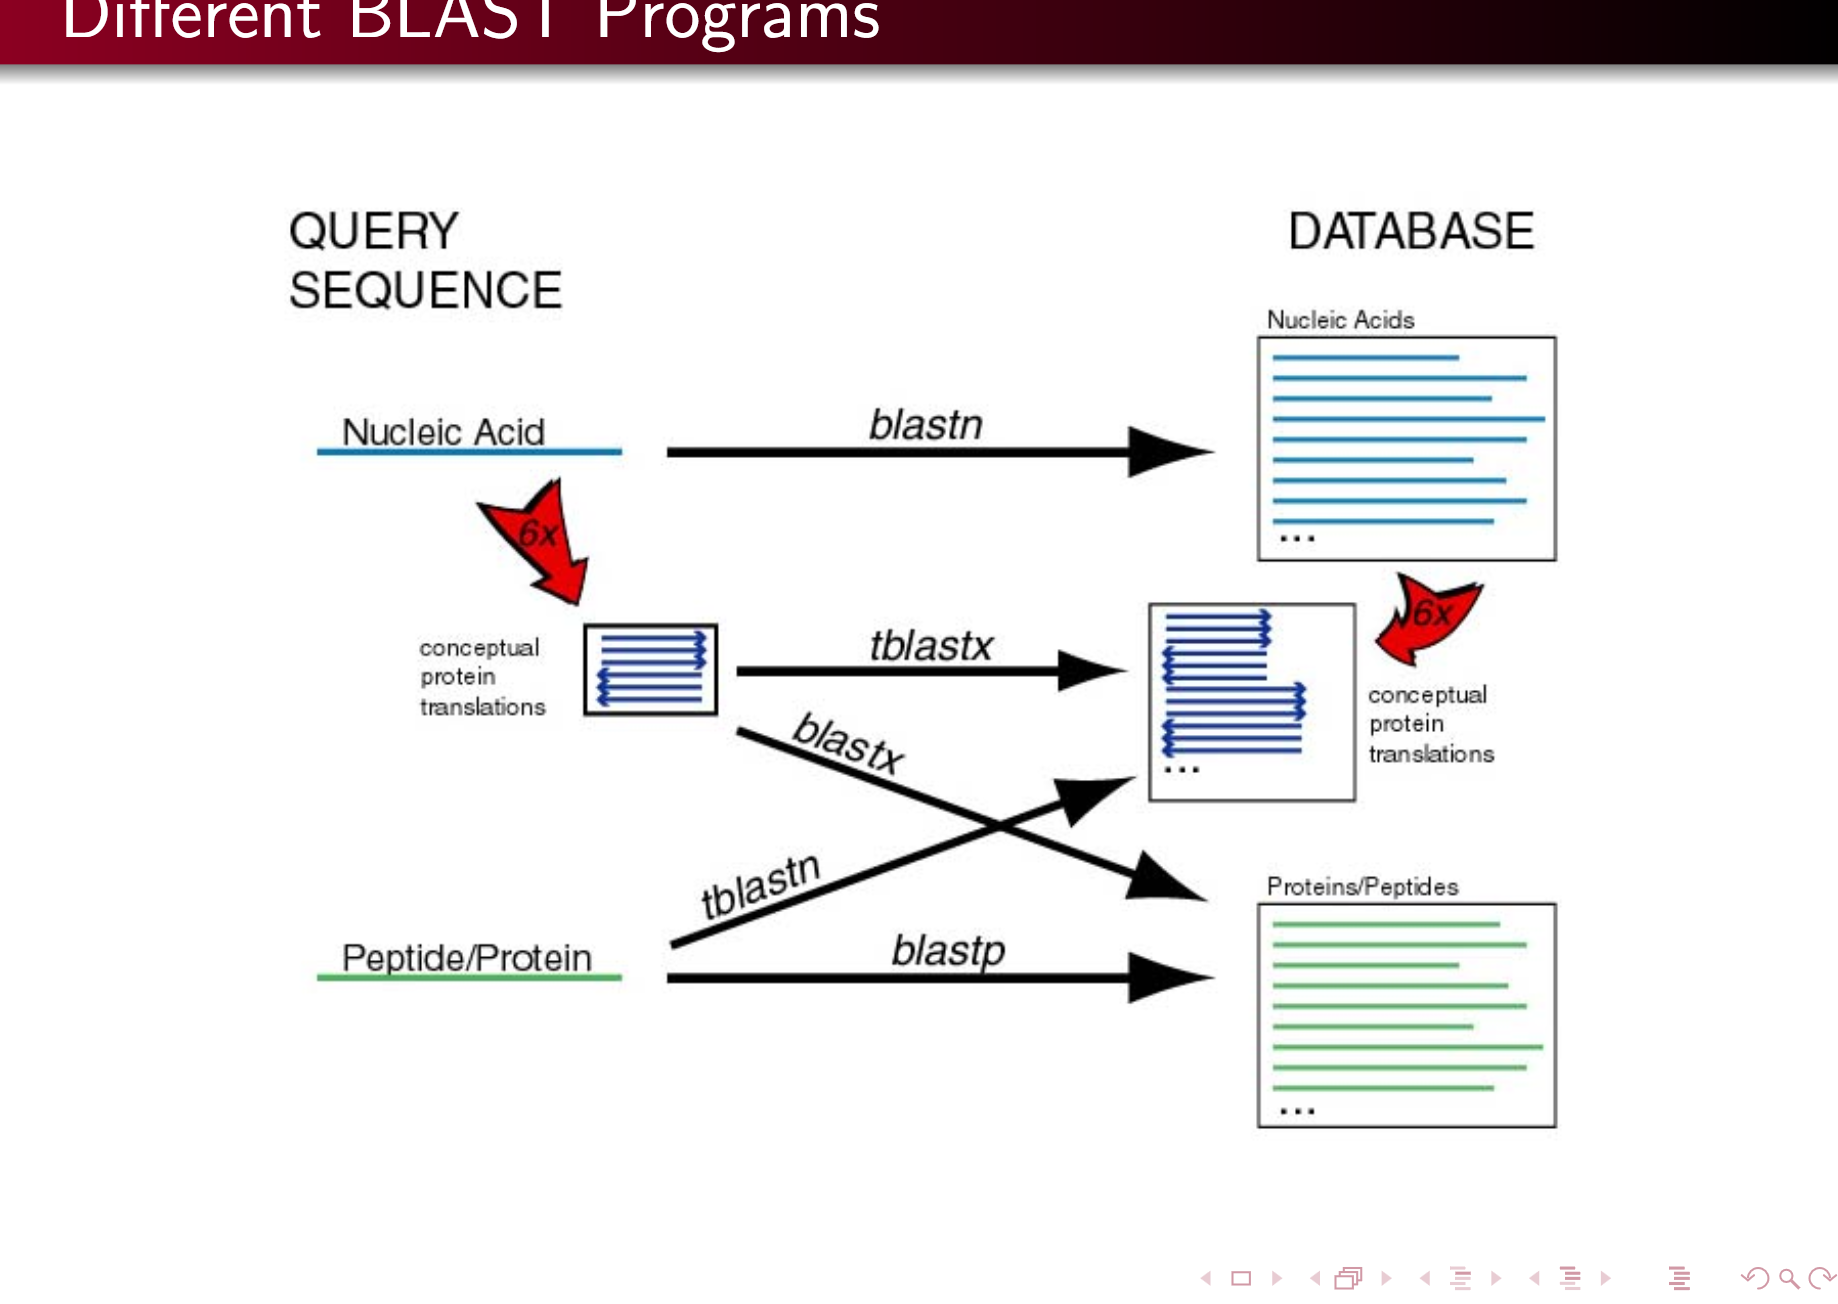

In [ ]:
"""

## 1. BLASTN (Nucleotide vs. Nucleotide)
**Input**: Nucleic acid sequence
**Database**: Nucleic acid sequences
**Use Case**: Finding similar nucleotide sequences (e.g., comparing DNA sequences).

"""

# Define a DNA sequence
dna_sequence = """>example_dna
ATGCGACTACGATCGAGGGCCAT"""

# Run BLASTN (Nucleotide vs. Nucleotide)
result_handle = NCBIWWW.qblast("blastn", "nt", dna_sequence)

# Parse results
blast_record = NCBIXML.read(result_handle)
print("\nBLASTN Results:")
for alignment in blast_record.alignments[:3]:  # Show top 3 matches
    print(f"Title: {alignment.title}")
    for hsp in alignment.hsps:
        print(f"E-value: {hsp.expect}")

"""
## 2. BLASTP (Protein vs. Protein)
**Input**: Protein sequence
**Database**: Protein sequences
**Use Case**: Finding homologous proteins (e.g., comparing a protein sequence against known proteins).

Example:
"""

# Define a protein sequence
protein_sequence = """>example_protein
MGLSDGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKF"""

# Run BLASTP
result_handle = NCBIWWW.qblast("blastp", "swissprot", protein_sequence)

# Parse results
blast_record = NCBIXML.read(result_handle)
print("\nBLASTP Results:")
for alignment in blast_record.alignments[:3]:  # Show top 3 matches
    print(f"Title: {alignment.title}")
    for hsp in alignment.hsps:
        print(f"E-value: {hsp.expect}")

"""
## 3. TBLASTN (Protein vs. Translated Nucleotide)
**Input**: Protein sequence
**Database**: Translated nucleotide sequences
**Use Case**: Searching for potential coding regions in nucleotide databases using a protein query.

Example:
"""

# Run TBLASTN
result_handle = NCBIWWW.qblast("tblastn", "nt", protein_sequence)

# Parse results
blast_record = NCBIXML.read(result_handle)
print("\nTBLASTN Results:")
for alignment in blast_record.alignments[:3]:  # Show top 3 matches
    print(f"Title: {alignment.title}")
    for hsp in alignment.hsps:
        print(f"E-value: {hsp.expect}")

"""
## 4. BLASTX (Translated Nucleotide vs. Protein)
**Input**: Nucleotide sequence (translated into six reading frames)
**Database**: Protein sequences
**Use Case**: Searching protein databases using a translated nucleotide sequence.

Example:
"""

# Run BLASTX
result_handle = NCBIWWW.qblast("blastx", "swissprot", dna_sequence)

# Parse results
blast_record = NCBIXML.read(result_handle)
print("\nBLASTX Results:")
for alignment in blast_record.alignments[:3]:  # Show top 3 matches
    print(f"Title: {alignment.title}")
    for hsp in alignment.hsps:
        print(f"E-value: {hsp.expect}")

"""
## 5. TBLASTX (Translated Nucleotide vs. Translated Nucleotide)
**Input**: Nucleotide sequence (translated into six reading frames)
**Database**: Translated nucleotide sequences
**Use Case**: Comparing conceptual protein translations between nucleotide sequences.

Example:
"""

# Run TBLASTX
result_handle = NCBIWWW.qblast("tblastx", "nt", dna_sequence)

# Parse results
blast_record = NCBIXML.read(result_handle)
print("\nTBLASTX Results:")
for alignment in blast_record.alignments[:3]:  # Show top 3 matches
    print(f"Title: {alignment.title}")
    for hsp in alignment.hsps:
        print(f"E-value: {hsp.expect}")

'''
Explanation

    BLASTN: Searches for similarity between nucleotide sequences. Useful for finding conserved regions in DNA or RNA sequences.
    BLASTP: Compares a protein sequence against known protein sequences in a database. Ideal for finding homologs.
    TBLASTN: Allows protein sequences to be searched against translated nucleotide databases. It identifies nucleotide sequences that could code for similar proteins.
    BLASTX: Translates a nucleotide sequence into six possible protein sequences (reading frames) and compares them to a protein database.
    TBLASTX: Translates both the query and database nucleotide sequences into six frames and compares their conceptual translations.

'''

## Resources for Learning More

- **Biopython Documentation**:
  - [Biopython Official Documentation](http://biopython.org/DIST/docs/tutorial/Tutorial.html) - Learn more about Biopython, including detailed guides on performing and parsing BLAST searches.

- **Understanding BLAST**:
  - [NCBI BLAST Help](https://www.ncbi.nlm.nih.gov/books/NBK1762/) - Understand different BLAST types, databases, and result interpretation.
  - [BLAST® Command Line Applications User Manual](https://www.ncbi.nlm.nih.gov/books/NBK279690/) - Provides insights into the command-line tools for BLAST, enriching understanding of what occurs behind the scenes in `NCBIWWW.qblast`.

- **Biopython Examples**:
  - [Biopython Cookbook](http://biopython.org/DIST/docs/cookbook/) - Contains practical examples of using Biopython, including BLAST operations.
